In [0]:
!git clone 'https://github.com/open-mmlab/mmdetection.git'

Cloning into 'mmdetection'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 10219 (delta 5), reused 1 (delta 0), pack-reused 10207
Receiving objects: 100% (10219/10219), 7.55 MiB | 3.18 MiB/s, done.
Resolving deltas: 100% (7125/7125), done.


In [0]:
%cd mmdetection

/content/mmdetection


In [0]:
!ls

configs  docker  LICENSE  pytest.ini  requirements	setup.py  tools
demo	 docs	 mmdet	  README.md   requirements.txt	tests


In [0]:
!pip install -r requirements/build.txt

In [0]:
!pip install -v -e .

Created temporary directory: /tmp/pip-ephem-wheel-cache-9q3a9wga
Created temporary directory: /tmp/pip-req-tracker-30j4ps9z
Created requirements tracker '/tmp/pip-req-tracker-30j4ps9z'
Created temporary directory: /tmp/pip-install-yfl5y329
Obtaining file:///content/mmdetection
  Added file:///content/mmdetection to build tracker '/tmp/pip-req-tracker-30j4ps9z'
    Running setup.py (path:/content/mmdetection/setup.py) egg_info for package from file:///content/mmdetection
    Running command python setup.py egg_info
    running egg_info
    creating mmdet.egg-info
    writing mmdet.egg-info/PKG-INFO
    writing dependency_links to mmdet.egg-info/dependency_links.txt
    writing requirements to mmdet.egg-info/requires.txt
    writing top-level names to mmdet.egg-info/top_level.txt
    writing manifest file 'mmdet.egg-info/SOURCES.txt'
    writing manifest file 'mmdet.egg-info/SOURCES.txt'
    /usr/local/lib/python3.6/dist-packages/torch/utils/cpp_extension.py:304: UserWarning: Attempted t

In [0]:
!ls ../../input/data-washinghand/data/VOC2007

In [0]:
cd /content/

/content


In [0]:
!unzip data.zip -d data

Archive:  data.zip
   creating: data/data/
   creating: data/data/VOC2007/
   creating: data/data/VOC2007/JPEGImages/
  inflating: data/data/VOC2007/JPEGImages/12-07.jpg  
  inflating: data/data/VOC2007/JPEGImages/12-06.jpg  
  inflating: data/data/VOC2007/JPEGImages/12-05.jpg  
  inflating: data/data/VOC2007/JPEGImages/12-04.jpg  
  inflating: data/data/VOC2007/JPEGImages/12-03.jpg  
  inflating: data/data/VOC2007/JPEGImages/12-02.jpg  
  inflating: data/data/VOC2007/JPEGImages/12-01.jpg  
  inflating: data/data/VOC2007/JPEGImages/12-00.jpg  
  inflating: data/data/VOC2007/JPEGImages/11-09.jpg  
  inflating: data/data/VOC2007/JPEGImages/11-08.jpg  
  inflating: data/data/VOC2007/JPEGImages/11-07.jpg  
  inflating: data/data/VOC2007/JPEGImages/11-06.jpg  
  inflating: data/data/VOC2007/JPEGImages/11-05.jpg  
  inflating: data/data/VOC2007/JPEGImages/11-04.jpg  
  inflating: data/data/VOC2007/JPEGImages/11-03.jpg  
  inflating: data/data/VOC2007/JPEGImages/11-02.jpg  
  inflating: data/

In [0]:
!ls /content/data/data/VOC2007/

Annotations  ImageSets	JPEGImages


In [0]:
%cd /content/mmdetection/configs/pascal_voc/

/content/mmdetection/configs/pascal_voc


In [0]:
%%writefile ssd300_voc0712.py
# %load ssd300_voc0712.py
_base_ = [
    '../_base_/models/ssd300.py', '../_base_/datasets/voc0712.py',
    '../_base_/default_runtime.py'
]
model = dict(
    bbox_head=dict(
        num_classes=2, anchor_generator=dict(basesize_ratio_range=(0.2,
                                                                    0.9))))
# dataset settings
dataset_type = 'VOCDataset'
data_root = '/content/data/data/VOC2007/'
img_norm_cfg = dict(mean=[123.675, 116.28, 103.53], std=[1, 1, 1], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile', to_float32=True),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(
        type='PhotoMetricDistortion',
        brightness_delta=32,
        contrast_range=(0.5, 1.5),
        saturation_range=(0.5, 1.5),
        hue_delta=18),
    dict(
        type='Expand',
        mean=img_norm_cfg['mean'],
        to_rgb=img_norm_cfg['to_rgb'],
        ratio_range=(1, 4)),
    dict(
        type='MinIoURandomCrop',
        min_ious=(0.1, 0.3, 0.5, 0.7, 0.9),
        min_crop_size=0.3),
    dict(type='Resize', img_scale=(300, 300), keep_ratio=False),
    dict(type='Normalize', **img_norm_cfg),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels']),
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(300, 300),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=False),
            dict(type='Normalize', **img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]
data = dict(
    samples_per_gpu=2,
    workers_per_gpu=2,
    train=dict(
        type='RepeatDataset', times=10, dataset=dict(pipeline=train_pipeline)),
    val=dict(pipeline=test_pipeline),
    test=dict(pipeline=test_pipeline))
# optimizer
optimizer = dict(type='SGD', lr=1e-3, momentum=0.9, weight_decay=5e-4)
optimizer_config = dict()
# learning policy
lr_config = dict(
    policy='step',
    warmup='linear',
    warmup_iters=500,
    warmup_ratio=0.001,
    step=[16, 20])
checkpoint_config = dict(interval=1)
# runtime settings
total_epochs = 2


Overwriting ssd300_voc0712.py


In [0]:
%cd /content/mmdetection/configs/_base_/datasets/

/content/mmdetection/configs/_base_/datasets


In [0]:
%%writefile voc0712.py
# %load voc0712.py
# dataset settings
dataset_type = 'VOCDataset'
data_root = '/content/data/data/VOC2007/'
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True),
    dict(type='Resize', img_scale=(1000, 600), keep_ratio=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(type='Normalize', **img_norm_cfg),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels']),
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1000, 600),
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **img_norm_cfg),
            dict(type='Pad', size_divisor=32),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]
data = dict(
    samples_per_gpu=2,
    workers_per_gpu=2,
    train=dict(
        type='RepeatDataset',
        times=3,
        dataset=dict(
            type=dataset_type,
            ann_file=[
                data_root + 'ImageSets/Main/trainval.txt',
                data_root + 'ImageSets/Main/trainval.txt'
            ],
            img_prefix=[data_root, data_root],
            pipeline=train_pipeline)),
    val=dict(
        type=dataset_type,
        ann_file=data_root + 'ImageSets/Main/test.txt',
        img_prefix=data_root,
        pipeline=test_pipeline),
    test=dict(
        type=dataset_type,
        ann_file=data_root + 'ImageSets/Main/test.txt',
        img_prefix=data_root,
        pipeline=test_pipeline))
evaluation = dict(interval=1, metric='mAP')


Overwriting voc0712.py


In [0]:
%cd /content/mmdetection/configs/_base_/models/

/content/mmdetection/configs/_base_/models


In [0]:
%%writefile ssd300.py
# %load ssd300.py
# model settings
input_size = 300
model = dict(
    type='SingleStageDetector',
    pretrained='open-mmlab://vgg16_caffe',
    backbone=dict(
        type='SSDVGG',
        input_size=input_size,
        depth=16,
        with_last_pool=False,
        ceil_mode=True,
        out_indices=(3, 4),
        out_feature_indices=(22, 34),
        l2_norm_scale=20),
    neck=None,
    bbox_head=dict(
        type='SSDHead',
        in_channels=(512, 1024, 512, 256, 256, 256),
        num_classes=2,
        anchor_generator=dict(
            type='SSDAnchorGenerator',
            scale_major=False,
            input_size=input_size,
            basesize_ratio_range=(0.15, 0.9),
            strides=[8, 16, 32, 64, 100, 300],
            ratios=[[2], [2, 3], [2, 3], [2, 3], [2], [2]]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[.0, .0, .0, .0],
            target_stds=[0.1, 0.1, 0.2, 0.2])))
cudnn_benchmark = True
train_cfg = dict(
    assigner=dict(
        type='MaxIoUAssigner',
        pos_iou_thr=0.5,
        neg_iou_thr=0.5,
        min_pos_iou=0.,
        ignore_iof_thr=-1,
        gt_max_assign_all=False),
    smoothl1_beta=1.,
    allowed_border=-1,
    pos_weight=-1,
    neg_pos_ratio=3,
    debug=False)
test_cfg = dict(
    nms=dict(type='nms', iou_thr=0.45),
    min_bbox_size=0,
    score_thr=0.02,
    max_per_img=200)

Overwriting ssd300.py


In [0]:
%cd /content/mmdetection/configs/_base_/

/content/mmdetection/configs/_base_


In [0]:
%%writefile default_runtime.py
# %load default_runtime.py
checkpoint_config = dict(interval=1)
# yapf:disable
log_config = dict(
    interval=50,
    hooks=[
        dict(type='TextLoggerHook'),
        # dict(type='TensorboardLoggerHook')
    ])
# yapf:enable
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = None
resume_from = None
work_dir = '/content/mmdetection/docker/'
workflow = [('train', 1)]


Overwriting default_runtime.py


In [0]:
!ls

datasets  default_runtime.py  models  schedules


In [0]:
%cd /content/mmdetection/mmdet/datasets/

/content/mmdetection/mmdet/datasets


In [0]:
%%writefile voc.py
# %load voc.py
from mmdet.core import eval_map, eval_recalls
from .builder import DATASETS
from .xml_style import XMLDataset


@DATASETS.register_module()
class VOCDataset(XMLDataset):

    CLASSES = ('washing hand',)

    def __init__(self, **kwargs):
        super(VOCDataset, self).__init__(**kwargs)
        if 'VOC2007' in self.img_prefix:
            self.year = 2007
        elif 'VOC2012' in self.img_prefix:
            self.year = 2012
        else:
            raise ValueError('Cannot infer dataset year from img_prefix')

    def evaluate(self,
                 results,
                 metric='mAP',
                 logger=None,
                 proposal_nums=(100, 300, 1000),
                 iou_thr=0.5,
                 scale_ranges=None):
        if not isinstance(metric, str):
            assert len(metric) == 1
            metric = metric[0]
        allowed_metrics = ['mAP', 'recall']
        if metric not in allowed_metrics:
            raise KeyError(f'metric {metric} is not supported')
        annotations = [self.get_ann_info(i) for i in range(len(self))]
        eval_results = {}
        if metric == 'mAP':
            assert isinstance(iou_thr, float)
            if self.year == 2007:
                ds_name = 'voc07'
            else:
                ds_name = self.dataset.CLASSES
            mean_ap, _ = eval_map(
                results,
                annotations,
                scale_ranges=None,
                iou_thr=iou_thr,
                dataset=ds_name,
                logger=logger)
            eval_results['mAP'] = mean_ap
        elif metric == 'recall':
            gt_bboxes = [ann['bboxes'] for ann in annotations]
            if isinstance(iou_thr, float):
                iou_thr = [iou_thr]
            recalls = eval_recalls(
                gt_bboxes, results, proposal_nums, iou_thr, logger=logger)
            for i, num in enumerate(proposal_nums):
                for j, iou in enumerate(iou_thr):
                    eval_results[f'recall@{num}@{iou}'] = recalls[i, j]
            if recalls.shape[1] > 1:
                ar = recalls.mean(axis=1)
                for i, num in enumerate(proposal_nums):
                    eval_results[f'AR@{num}'] = ar[i]
        return eval_results

Overwriting voc.py


In [0]:
%cd /content/mmdetection/

/content/mmdetection


In [0]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
/usr/local/lib/python3.6/dist-packages/torch/utils/cpp_extension.py:304: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
writing manifest file 'mmdet.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
copying mmdet/version.py -> build/lib.linux-x86_64-3.6/mmdet
running build_ext
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/mmdet
creating build/bdist.linux-x86_64/egg/mmdet/apis
copying build/lib.linux-x86_64-3.6/mmdet/apis/__init__.py -> build/bdist.linux-x86_64/egg/mmdet/apis
copying build/l

In [0]:
%cd tools

/content/mmdetection/tools


In [0]:
!pip install pycocotools

In [0]:
!python train.py /content/mmdetection/configs/pascal_voc/ssd300_voc0712.py

2020-05-15 13:11:56,637 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.6.9 (default, Apr 18 2020, 01:56:04) [GCC 8.4.0]
CUDA available: True
CUDA_HOME: /usr/local/cuda
NVCC: Cuda compilation tools, release 10.1, V10.1.243
GPU 0: Tesla T4
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.5.0+cu101
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2019.0.5 Product Build 20190808 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=co

In [0]:
pip install yapf

     |████████████████████████████████| 194kB 10.7MB/s 


In [0]:
!python setup.py develop

running develop
running egg_info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
/usr/local/lib/python3.6/dist-packages/torch/utils/cpp_extension.py:304: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
writing manifest file 'mmdet.egg-info/SOURCES.txt'
running build_ext
copying build/lib.linux-x86_64-3.6/mmdet/ops/utils/compiling_info.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/utils
copying build/lib.linux-x86_64-3.6/mmdet/ops/nms/nms_ext.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/nms
copying build/lib.linux-x86_64-3.6/mmdet/ops/roi_align/roi_align_ext.cpython-36m-x86_64-linux-gnu.so -> mmdet/ops/roi_align
copying build/lib.linux-x86_64-3.6/mmdet/ops/roi_pool/roi_pool_ext.cpyth

In [0]:
%cd /content/mmdetection/

/content/mmdetection


{'label': 'washing_hands', 'score': 0.8715413212776184, 'box': {'x1': 52, 'y1': 21, 'x2': 582, 'y2': 407}}


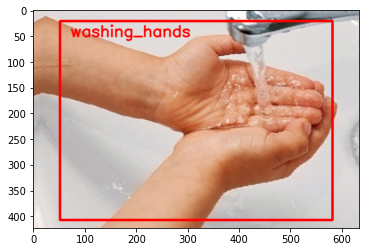

In [0]:
from mmcv.runner import load_checkpoint
from mmdet.apis import inference_detector, show_result_pyplot, init_detector
import matplotlib.pyplot as plt
import cv2


%matplotlib inline

checkpoint_file = "/content/mmdetection/docker/latest.pth"
config_fname = "/content/mmdetection/configs/pascal_voc/ssd300_voc0712.py"
score_thr = 0.55

# build the model from a config file and a checkpoint file
model = init_detector(config_fname, checkpoint_file)

# test a single image and show the results
img = '/content/data/data/VOC2007/JPEGImages/1-04.jpg'
predictions = inference_detector(model, img)
results = []
for i, label in enumerate(["washing_hands"]):
    prediction = predictions[i]
    for box in prediction:
        bndbox = box[:4]
        bndbox = [int(x_) for x_ in bndbox]
        confidence = float(box[4])
        if confidence < 0.7:
            continue

        result = {"label":label,"score":confidence,"box":{"x1":bndbox[0],"y1":bndbox[1],"x2":bndbox[2],"y2":bndbox[3]}}
        
        print(result)
x1=int(result["box"]["x1"])
y1=int(result["box"]["y1"])
x2=int(result["box"]["x2"])
y2=int(result["box"]["y2"])
font = cv2.FONT_HERSHEY_SIMPLEX 
       
img=cv2.imread("/content/data/data/VOC2007/JPEGImages/1-04.jpg")
img = cv2.rectangle(img, (x1,y1), (x2,y2), (0,0,255), 3)
img = cv2.putText(img, label, (x1+20,y1+30),font, 1,(0,0,255) , 2, cv2.LINE_AA) 
#image = cv2.putText(image, 'OpenCV', org, font, fontScale, color, thickness, cv2.LINE_AA) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# as opencv loads in BGR format by default, we want to show it in RGB.
plt.show()
